# Black-Box diffusion model advirsarial attack


In [ ]:
import torch
import pandas as pd
from google.colab import drive

Load prompt csv file:

In [ ]:
drive.mount('/content/gdrive')

df = pd.read_excel('/content/gdrive/MyDrive/black_box_project/Unorderd data for diffusion model.xlsx')

prompt_df = pd.concat([df.iloc[0::2].reset_index(drop=True), df.iloc[1::2].reset_index(drop=True)], axis=1)
prompt_df.columns = ["Dog_prompts", "Animal_prompts"]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Diffusion model


Model ref: https://huggingface.co/stabilityai/stable-diffusion-3.5-medium


installs:


In [ ]:
# for diffusers
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --upgrade
#!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:

from PIL import Image
import torch


from diffusers import DiffusionPipeline

#pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
pipe = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

#pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large-turbo", torch_dtype=torch.float16)
#pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium-turbo")
#pipe = DiffusionPipeline.from_pretrained("tensorart/stable-diffusion-3.5-medium-turbo")
pipe.to("cuda")

#prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
#image = pipe(prompt).images[0]

#pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
#pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
prompt = ["The curious dog discovered a hidden treasure buried in the backyard", "The curious cat discovered a hidden treasure buried in the backyard"]
output = pipe(prompt=prompt).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Generate images
#prompt = "The curious dog discovered a hidden treasure buried in the backyard"

#output_images = pipe(prompt=prompt).images

prompt = ["car race on the road","car race on the roadWF0=!","a dog in the backyard"]
output_images = pipe(prompt=prompt).images

# Display images

for img in output_images:
    display(img)



NameError: name 'pipe' is not defined

Clip download

In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPVisionModelWithProjection



In [ ]:
model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-base-patch32")
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")



config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Expeiriement

In [ ]:
#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
image1= output_images[0]
image2= output_images[1]
inputs1 = processor(images=image1, return_tensors="pt")
inputs2 = processor(images=image2, return_tensors="pt")

outputs1 = model(**inputs1)
outputs2 = model(**inputs2)
image_embeds1 = outputs1.image_embeds
image_embeds2 = outputs2.image_embeds
print(compute_scores(image_embeds1,image_embeds2))

[0.6855483055114746]


In [ ]:
image_embeds1.shape

torch.Size([1, 512])

# pyGAD inference experiment- genetic algoritem

Installs:

In [ ]:
# for diffusers
%%capture
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install datasets
!pip3 install pygad
!pip install openpyxl

Imports:

In [ ]:
import PIL
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd
import os
import random
from tqdm import tqdm
import string
import numpy as np
import pygad #להסתכל על דוקומנטציה של פייגד
import torchvision.transforms.functional as F
from diffusers import DiffusionPipeline
#https://huggingface.co/docs/diffusers/main/en/api/diffusion_pipeline
#להסתכל על הגדרות של פייפליין ונוכל להקל בתנאים ולשפר ביצועים בקטנה.
from transformers import AutoImageProcessor, BitForImageClassification

In [ ]:
#@title Helper functions
## Functions:
"""
def initilize_codes(code_population: int, code_length: int) -> list[str]:
    #The function initilize_codes generates a list of random alphanumeric strings, where the number of strings and their lengths are specified as parameters.
    codes = []
    for _ in range(code_population):
      random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=code_length))
      codes.append(random_string)

    return codes
#add another functions that gets a list of char combinations and create the next generation, the function also gets as parameters: len of next generation..etc"
def load_data(path: str):
    #This function load_data is designed to read data from an Excel file, process it into a structured format, and generate a list of random codes.
    df = pd.read_excel(path)
    prompt_df = pd.concat([df.iloc[0::2].reset_index(drop=True), df.iloc[1::2].reset_index(drop=True)], axis=1)
    prompt_df.columns = ["Dog_prompts", "Animal_prompts"]
    codes = initilize_codes(code_population=code_population, code_length=code_length)
    return prompt_df, codes

def compute_scores(emb_one, emb_two):
    #Computes cosine similarity between two vectors.
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two).cpu()
    #return scores.numpy().tolist()
    return scores.detach().numpy().tolist()

def fetch_similar(batch, top_k=5):
    #Fetches the `top_k` similar images with `image` as the query.

    batch['loss'] = compute_scores(batch['dog_embeddings'], batch['animal_embeddings'])
    similarity_mapping = dict(zip(batch['code'], batch['loss']))

    # Sort the mapping dictionary and return `top_k` candidates.
    similarity_mapping_sorted = dict(sorted(similarity_mapping.items(), key=lambda x: x[1], reverse=True))
    code_entries = list(similarity_mapping_sorted.keys())[:top_k]

    return code_entries
    #need to write similar function who finds the top_k similar vectors to our targeted vector
##############################Amit Added function#####################
def fetch_distant(batch, top_k=5):
    #Fetches the `top_k` most distant images with `image` as the query.

    # Compute scores (distances) for each image
    batch['loss'] = compute_scores(batch['dog_embeddings'], batch['animal_embeddings'])
    similarity_mapping = dict(zip(batch['code'], batch['loss']))

    # Sort the mapping dictionary in ascending order and return `top_k` candidates
    similarity_mapping_sorted = dict(sorted(similarity_mapping.items(), key=lambda x: x[1]))
    code_entries = list(similarity_mapping_sorted.keys())[:top_k]

    return code_entries
#################################################################
"""


In [ ]:
#@title Classes
## Classes:
class DiffusionAdversarialAttackDataset(torch.utils.data.Dataset):
    '''
    Input:
    Output: dataset[idx][dict] sorted by codes
    '''

    def __init__(self, prompts_df: pd.DataFrame, f=None, shuffle=False, batch_size=None, mode='testing', diffusion_model=None, embedding_model=None, trandform_embbedings_model=None):
        """prompts_df: DataFrame with two columns: "Animal_prompts" and "Dog_prompts".
        f: Optional, used later in custom collation for shuffling.
        shuffle: Boolean to decide whether to shuffle batches during collation.
        batch_size: Number of prompts processed at a time. Defaults to the size of prompts_df if not provided.
        mode: Determines how many rows of prompts_df to use. Defaults to 'testing', limiting rows to 2.
        diffusion_model, embedding_model, trandform_embbedings_model: Models used for generating images and embeddings.
        """
        super().__init__()
        self.end = 2 if mode == 'testing' else prompts_df.shape[0]
        self.shuffle = shuffle
        self.batch_size = prompts_df.shape[0] if batch_size==None else batch_size


        self.input_prompts, self.target_prompts = self.preprocess_prompts(prompts_df)

        if diffusion_model and embedding_model and trandform_embbedings_model:
            self.diffusion_model = diffusion_model
            self.embedding_model = embedding_model
            self.trandform_embbedings_model = trandform_embbedings_model
            self.dog_images, self.dog_embeddings = self.get_images_and_embeddings(self.target_prompts, self.batch_size, diffusion_model, embedding_model, trandform_embbedings_model)


    def __len__(self):
        return len(self.input_prompts)

    def __getitem__(self, idx):#לערוך לפי הצורך שלנו
        input_prompt = self.input_prompts[idx]
        target_prompt = self.target_prompts[idx]

        dog_images = self.dog_images[idx]
        dog_embeddings = self.dog_embeddings[idx]

        return {'input_prompt': input_prompt, 'target_prompt': target_prompt, 'dog_images': dog_images, 'dog_embeddings': dog_embeddings}

    def preprocess_prompts(self, prompts: pd.DataFrame) -> list[str]:#מיותר
        animal_prompts = prompts.Animal_prompts.tolist()[:self.end]
        dog_prompts = prompts.Dog_prompts.tolist()[:self.end]
        #input_prompts = [self.remove_redundancies(prompt) for prompt in animal_prompts]
        #target_prompts = [self.remove_redundancies(prompt) for prompt in dog_prompts]
        #return input_prompts, target_prompts
        return animal_prompts, dog_prompts

    def get_images_and_embeddings(self, target_prompts, batch_size, diffusion_model, embedding_model, trandform_embbedings_model):
        #Generates images and embeddings for the target prompts:
        num_batches = (len(target_prompts) + batch_size - 1) // batch_size
        dog_images = []
        dog_embeddings = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, len(target_prompts))
            batch_chunk = target_prompts[start_idx:end_idx]

            if diffusion_model:
                batch_dog_images = diffusion_model.forward(batch_chunk)
                dog_images.extend(batch_dog_images)

            if embedding_model:
                if dog_images is not None:
                    x = embedding_model.forward(batch_dog_images)
                    batch_dog_embeddings = trandform_embbedings_model.forward(x)
                    dog_embeddings.append(batch_dog_embeddings)

        dog_embeddings = torch.cat(dog_embeddings, dim=0)

        return dog_images, dog_embeddings
    """
      לשאול את שחר למה זה קרה ? הרי יש משמעת סמנטית למשפט עם 2 חלקם. אם העניין זה חוסר יכולת חישובית להתמודד עם משפטיםארוכים פשוט מראש לא נבנה ככה את הדאטא בייס שלנו.
          def remove_redundancies(self, prompt: str) -> str:
              parts = prompt[::-1].split('.')
              return parts[1][::-1]
    """
    def custom_collate(self, batch):
        full_batch = {
            'animal_prompts': [item['input_prompt'] for item in batch],
            'dog_prompts': [item['target_prompt'] for item in batch],
            'dog_images': [item['dog_images'] for item in batch],
            'dog_embeddings': [item['dog_embeddings'] for item in batch],
        }

        if self.shuffle and f:
            random_indices = torch.randperm(len(batch))[:f]
            collated_batch = {
                'animal_prompts': [full_batch['animal_prompts'][i] for i in random_indices],
                'dog_prompts': [full_batch['dog_prompts'][i] for i in random_indices],
                'dog_images': [full_batch['dog_images'][i] for i in random_indices],
                'dog_embeddings': [full_batch['dog_embeddings'][i] for i in random_indices],
            }
        elif self.shuffle:
            random_indices = torch.randperm(len(batch))
            collated_batch = {
                'animal_prompts': [full_batch['animal_prompts'][i] for i in random_indices],
                'dog_prompts': [full_batch['dog_prompts'][i] for i in random_indices],
                'dog_images': [full_batch['dog_images'][i] for i in random_indices],
                'dog_embeddings': [full_batch['dog_embeddings'][i] for i in random_indices],
            }
        else:
            collated_batch = full_batch

        return collated_batch

class DiffusionPipeLine():
  #This class handles generating images using a pre-trained diffusion model (Stable Diffusion).
  def __init__(self, device: str):
      self.device = device

      self.model = DiffusionPipeline.from_pretrained(
          "stabilityai/stable-diffusion-xl-base-1.0",
          torch_dtype=torch.float16,
          use_safetensors=True,
          variant="fp16"
          )
      self.model.to(self.device)

  def forward(self, batch: list):
      with torch.no_grad(): # Was added
          batch_images = self.model(batch).images
      return batch_images

class ImageEmbeddingPipeline():
  def __init__(self, device: str):
      self.device = device
      #בעצם קוראים למודל ספציפי שמבוסס על רס נט, ומשתמשים בו לקבלת האימבדד של התמונה, למה להשתמש ברסנט ולא בקליפ?
      #תשובה: לבדוק אם יש קליפ אופן סורס שעושה תמונה לאימבדד וזה יהיה יותר טוב מרסנט
      #https://huggingface.co/docs/transformers/en/model_doc/clip
      #שינוי להמשך: לשקול לשנות את הקלאס ככה שיקבל בכניסה שם של מודל אימבדד ואז נוכל לעשות ניסוים עם מודלי אימבדד שונים לדוגמה קליפ.
      self.image_processor = AutoImageProcessor.from_pretrained("google/bit-50")
      self.model = BitForImageClassification.from_pretrained("google/bit-50")
      self.model.config.output_hidden_states = True
      self.model.to(self.device)

  def forward(self, batch: dict):
      embeddings = self.get_embeddings(batch)
      return embeddings

  def get_embeddings(self, batch: list):
      images = batch

      image_batch_transformed = self.image_processor(images, return_tensors="pt").to(self.device)
      with torch.no_grad():
          embeddings = self.model(**image_batch_transformed).hidden_states[-1]
      return embeddings

class TransformForCostFunction(torch.nn.Module):#מיותר
  """The TransformForCostFunction class is a custom PyTorch module designed to process embeddings or hidden states and prepare them for a cost function, potentially involving dimensionality reduction or projection. Here’s a detailed breakdown of the class:"""
  #מהות: המרה של מרחב האימבדד כדי להצליח לחשב את הפונ קוסט
  def __init__(self, projection_head: bool, device: str):
      super().__init__()
      self.projection_head = True if projection_head else False
      self.device = device

      if self.projection_head:
        #למה בכלל אננו צריכים את זה ?
      #זה מאמר של פייסבוק עם רעיון כזה ...
         pass # Add projection head from swav
      else:
        self.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))

      self.to(self.device)

  def forward(self, batch: dict):
      batch_transformed = self.transform(batch)
      return batch_transformed

  def transform(self, last_hidden_states):
      if self.projection_head:
        return last_hidden_states # Add projection head from swav
      else:
        x = self.avgpool(last_hidden_states)
        x = torch.flatten(x, 1)
      return x

classes


In [ ]:
class DiffusionAdversarialAttackDataset(torch.utils.data.Dataset):
    '''
    Input:
    Output: dataset[idx][dict] sorted by codes
    '''

    def __init__(self,input_prompt,target_prompt,StartGen=100,GenIter=100,K_th_closest=10,SizeOfGen=100, diffusion_model=None, embedding_model=None,embedding_processor=None):
        """
        batch_size: Number of prompts processed at a time. Defaults to the size of prompts_df if not provided.
        diffusion_model, embedding_model: Models used for generating images and embeddings.
        """
        super().__init__()

        self.input_prompt=input_prompt
        self.target_prompt= target_prompt
        self.StartGen=StartGen
        self.GenIter=GenIter
        self.k=K_th_closest
        self.SizeOfGen=SizeOfGen

        if diffusion_model and embedding_model :
            self.diffusion_model = diffusion_model
            self.embedding_model = embedding_model
            self.embedding_processor = embedding_processor




    def get_embeddings_from_prompts(self,prompt): #gets a prompt, generate an image and embed it inside.. return the embedded image
        #Generates images and embeddings for the target prompts:
        image = self.diffusion_model(prompt=prompt).images
        input= self.embedding_processor(images=image, return_tensors="pt")
        output = self.embedding_model(**input)
        return output.image_embeds



    def initilize_codes(self,code_population, code_length) :
      """The function initilize_codes generates a list of random alphanumeric strings, where the number of strings and their lengths are specified as parameters."""
      codes = []
      for _ in range(code_population):
        random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=code_length))
        codes.append(random_string)
      return codes


    def compute_scores(self,emb_one, emb_two):
      """Computes cosine similarity between two vectors."""
      scores = torch.nn.functional.cosine_similarity(emb_one, emb_two).cpu()
      return scores.detach().numpy().tolist()

    def FirstGeneration(self):#create a list of codes in the len of StartGen and with the width of 5 chars

      return self.initilize_codes(self.StartGen,5)

    def create_next_generation(self,top_codes, num_offspring, crossover_rate=0.8, mutation_rate=0.2):
      """
      Generate the next generation of codes from the top-performing codes.

      Parameters:
      - top_codes: List of top-performing 5-character codes from the current generation.
      - num_offspring: Total number of codes to generate for the next generation.
      - crossover_rate: Probability of applying crossover between two parent codes.
      - mutation_rate: Probability of mutating a character in the code.

      Returns:
      - next_generation: List containing the new generation of codes.
      """
      next_generation = []
      code_length = len(top_codes[0])
      # Generate a list of all ASCII characters
      characters = string.ascii_letters + string.digits + string.punctuation      # [chr(i) for i in range(128)]

      # Elitism: Preserve the top-performing codes
      next_generation.extend(top_codes)

      # Generate the remaining offspring
      while len(next_generation) < num_offspring:
          # Selection: Randomly select two parent codes from the top-performing codes
          parent1, parent2 = random.sample(top_codes, 2)

          # Crossover
          if random.random() < crossover_rate:
            # Single-point crossover
              crossover_point = random.randint(1, code_length - 1)
              child = parent1[:crossover_point] + parent2[crossover_point:]
          else:
              # No crossover; child is a copy of one parent
              child = parent1

          # Mutation
          child = list(child)
          for i in range(code_length):
              if random.random() < mutation_rate:
                  child[i] = random.choice(characters)
          child = ''.join(child)

          # Add child to the next generation
          next_generation.append(child)

      # Trim the next generation to the desired number of offspring
      return next_generation[:num_offspring]
        #return(self.initilize_codes(self.GenIter,5))

    def EmbeddingAndScoresList(self,codes):#gets the codes list for the next generation, return a list with the codes, the embedings and the scores for each
        EmbList = []
        for i in range (len(codes)):
          new_input= self.input_prompt + codes[i]
          embedd=self.get_embeddings_from_prompts(new_input)
          #EmbList[i][0]=codes[i]
          #EmbList[i][1]=embedd
          #EmbList[i][2]=self.compute_scores(embedd,self.get_embeddings_from_prompts(self.target_prompt))
          embedd_str = str(embedd)  # Convert embedding to string
          score = self.compute_scores(embedd, self.get_embeddings_from_prompts(self.target_prompt))
          score_str = str(score)  # Convert score to string
          #EmbList.append([codes[i], embedd_str, score_str])  # Append as strings
          EmbList.append([codes[i],score_str])  # Append as strings

        #EmbList = sorted(EmbList, key=lambda x: x[2], reverse=True)
        EmbList = sorted(EmbList, key=lambda x: x[1], reverse=True)
        print(EmbList)
        return EmbList


    #def get_generation()

    # this function manage the run, this function should be the only one who is public

    def forward(self, isRunning=False):
      # Define the path to your Google Drive directory
      save_dir = '/content/gdrive/MyDrive/black_box_project'
      os.makedirs(save_dir, exist_ok=True)
      file_path = os.path.join(save_dir, 'current_generation.xlsx')


      print("Save dir:", save_dir)#debug
      print("File path:", file_path)#debug
      print("File exists?", os.path.exists(file_path))#debug

      # Step 1: Initialize or load the current generation
      if isRunning and os.path.exists(file_path):
          # Load the current generation from the Excel file
          df = pd.read_excel(file_path)
          current_generation = df['Code'].tolist()
          print("Loaded existing generation from Excel:", current_generation[:5], "...")#debug
      else:
          # Initialize the first generation
          current_generation = self.FirstGeneration()
          print("Initialized first generation:", current_generation[:5], "...")#debug

      # Compute the embedding of the target prompt once
      target_embedding = self.get_embeddings_from_prompts(self.target_prompt)

      # Step 2: Iterative evolution
      for generation in range(self.GenIter):
          print(f"--- Generation {generation+1} ---")#debug
          # Compute embeddings and scores for the current generation
          embeddings_scores = self.EmbeddingAndScoresList(current_generation)

          # Select the top K codes
          top_k_codes = [item[0] for item in embeddings_scores[:self.k]]

          # Generate the next generation of codes
          current_generation = self.create_next_generation(top_k_codes, self.SizeOfGen)

          # Save current_generation to Excel
          print (len(current_generation))
          df = pd.DataFrame(current_generation, columns=['Code'])
          print("Saving generation to Excel:")#debug
          print(df.head())  # just to see the top 5 rows,debug



          df.to_excel(file_path, index=False,engine='openpyxl')
          print("File saved. File now exists?", os.path.exists(file_path))


          df.to_excel(file_path, index=False)#debug
          df_check = pd.read_excel(file_path)  # read back immediately
          print(df_check.head(10))

          print(f"Generation {generation + 1} codes: {embeddings_scores}")


      # Step 3: Return the best code from the final generation
      best_code = embeddings_scores[0][0]
      return best_code





Set parameters:

In [ ]:
"""
# Genetic Algorithm
code_length = 10 # m in the paper
code_population = 1 # n in the paper

# parameters
seed = 42

prompt_path = '/content/gdrive/MyDrive/black_box_project/Unorderd data for diffusion model.xlsx'
f=50 # f=50 in the paper
# elitists = torch.ceil(code_population/5) # lambda(elitists) = n/5 in the paper
# k = 2 # tournament selection factor k=2 in the paper

# Reproducibility
random.seed(seed)
torch.manual_seed(seed)

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu" """

initalize run

In [ ]:
"""promptInitial = "The curious dog discovered a hidden treasure buried in the backyard" #add 5 chars to this at the end and than embed it
Initial=promptInitial+initilize_codes(1,5)[0]
print(Initial)
output_images_initial = pipe(prompt=Initial).images


promptTarget = ["car race"]
output_images_Target = pipe(prompt=promptTarget).images  #embedding to this

"""

The curious dog discovered a hidden treasure buried in the backyardlv03Z


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Inintialize pipeline:

In [ ]:
"""
diffusion_model = DiffusionPipeLine(device=device)
iamge_embedding_model = ImageEmbeddingPipeline(device=device)
adjust_embeddings_dim = TransformForCostFunction(projection_head=False, device=device)"""

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/102M [00:00<?, ?B/s]

Load excel and initialize data:

In [ ]:
# Check if loading function works:
prompt_df, codes = load_data(prompt_path)

# for now since i dont have enough memory
#dataset = DiffusionAdversarialAttackDataset(prompts_df=prompt_df, codes=codes, code_population=code_population, f=f, shuffle=True, mode="training")
#(self, prompts_df: pd.DataFrame, f=None, shuffle=False, batch_size=None, mode='testing', diffusion_model=None, embedding_model=None, trandform_embbedings_model=None)
dataset = DiffusionAdversarialAttackDataset(prompts_df=prompt_df, f=f, shuffle=True, mode="training",diffusion_model=diffusion_model, embedding_model=iamge_embedding_model, trandform_embbedings_model=adjust_embeddings_dim)
dataloader = DataLoader(dataset, batch_size=prompt_df.shape[0], collate_fn=dataset.custom_collate) # dataloader['dict.keys()']

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.04 GiB. GPU 0 has a total capacity of 14.75 GiB of which 351.06 MiB is free. Process 8062 has 14.40 GiB memory in use. Of the allocated memory 13.93 GiB is allocated by PyTorch, and 353.41 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

play to save modle parameters

In [ ]:
import pickle
# Save a variable
#with open('/content/gdrive/MyDrive/variables.pkl', 'wb') as f:pickle.dump(my_variable, f)
# Save Stable Diffusion model
pipe.save_pretrained('/content/gdrive/MyDrive/stable_diffusion_model')
image.save('/content/gdrive/MyDrive/output.png')
!pip freeze > /content/gdrive/MyDrive/requirements.txt


play to load modle parameters

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#with open('/content/gdrive/MyDrive/variables.pkl', 'rb') as f: my_variable = pickle.load(f)
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained('/content/gdrive/MyDrive/stable_diffusion_model')
pipe.to("cuda")
from PIL import Image
image = Image.open('/content/gdrive/MyDrive/output.png')
image.show()
!pip install -r /content/gdrive/MyDrive/requirements.txt --no-deps



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


RuntimeError: Failed to import diffusers.pipelines.pipeline_utils because of the following error (look up to see its traceback):
Failed to import diffusers.models.autoencoders.autoencoder_kl because of the following error (look up to see its traceback):
partially initialized module 'torch._dynamo' has no attribute 'config' (most likely due to a circular import)

Main Run

In [ ]:
# for diffusers
%%capture
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install datasets
!pip3 install pygad
!pip install openpyxl
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --upgrade


In [ ]:
import PIL
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd
import os
import random
from tqdm import tqdm
import string
import numpy as np
import pygad #להסתכל על דוקומנטציה של פייגד
import torchvision.transforms.functional as F
from diffusers import DiffusionPipeline
#https://huggingface.co/docs/diffusers/main/en/api/diffusion_pipeline
#להסתכל על הגדרות של פייפליין ונוכל להקל בתנאים ולשפר ביצועים בקטנה.
from transformers import AutoImageProcessor, BitForImageClassification
from google.colab import drive
drive.mount('/content/gdrive')
from huggingface_hub import notebook_login
notebook_login()
import requests
from transformers import AutoProcessor, CLIPVisionModelWithProjection

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/gdrive


In [ ]:
diffusion_pipe = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
diffusion_pipe.to("cuda")

#clip
clip_model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
attack =DiffusionAdversarialAttackDataset("car race on the road","a dog in the backyard",5,5,2,5, diffusion_pipe, clip_model, clip_processor)
best_code = attack.forward(True)
print(best_code)

Save dir: /content/gdrive/MyDrive/black_box_project
File path: /content/gdrive/MyDrive/black_box_project/current_generation.xlsx
File exists? True
Loaded existing generation from Excel: ['zzy*j', 'zzy=D', 'zzy*j', 'zz0*j', 'zzy=!'] ...


  0%|          | 0/50 [00:00<?, ?it/s]

--- Generation 1 ---


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[['zzy=!', '[0.4874045252799988]'], ['zz0*j', '[0.4648246169090271]'], ['zzy*j', '[0.40922001004219055]'], ['zzy=D', '[0.39844322204589844]'], ['zzy*j', '[0.3895145058631897]']]
5
Saving generation to Excel:
    Code
0  zzy=!
1  zz0*j
2  zzy=j
3  zz0=!
4  ha0*!
File saved. File now exists? True
    Code
0  zzy=!
1  zz0*j
2  zzy=j
3  zz0=!
4  ha0*!
Generation 1 codes: [['zzy=!', '[0.4874045252799988]'], ['zz0*j', '[0.4648246169090271]'], ['zzy*j', '[0.40922001004219055]'], ['zzy=D', '[0.39844322204589844]'], ['zzy*j', '[0.3895145058631897]']]
--- Generation 2 ---


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[['zz0=!', '[0.49090465903282166]'], ['zzy=!', '[0.46478915214538574]'], ['ha0*!', '[0.41657915711402893]'], ['zzy=j', '[0.41593071818351746]'], ['zz0*j', '[0.369279146194458]']]
5
Saving generation to Excel:
    Code
0  zz0=!
1  zzy=!
2  -zy=!
3  5zy:!
4  q7`=j
File saved. File now exists? True
    Code
0  zz0=!
1  zzy=!
2  -zy=!
3  5zy:!
4  q7`=j
Generation 2 codes: [['zz0=!', '[0.49090465903282166]'], ['zzy=!', '[0.46478915214538574]'], ['ha0*!', '[0.41657915711402893]'], ['zzy=j', '[0.41593071818351746]'], ['zz0*j', '[0.369279146194458]']]
--- Generation 3 ---


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[['zzy=!', '[0.5098536610603333]'], ['zz0=!', '[0.4902411997318268]'], ['-zy=!', '[0.48601895570755005]'], ['5zy:!', '[0.4357202649116516]'], ['q7`=j', '[0.42240414023399353]']]
5
Saving generation to Excel:
    Code
0  zzy=!
1  zz0=!
2  zzy=!
3  zzy=f
4  WF0=!
File saved. File now exists? True
    Code
0  zzy=!
1  zz0=!
2  zzy=!
3  zzy=f
4  WF0=!
Generation 3 codes: [['zzy=!', '[0.5098536610603333]'], ['zz0=!', '[0.4902411997318268]'], ['-zy=!', '[0.48601895570755005]'], ['5zy:!', '[0.4357202649116516]'], ['q7`=j', '[0.42240414023399353]']]
--- Generation 4 ---


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[['zzy=!', '[0.460954874753952]'], ['WF0=!', '[0.4590798318386078]'], ['zzy=f', '[0.4232553541660309]'], ['zzy=!', '[0.41385072469711304]'], ['zz0=!', '[0.40964511036872864]']]
5
Saving generation to Excel:
    Code
0  zzy=!
1  WF0=!
2  WFye!
3  zzE=!
4  Szy=!
File saved. File now exists? True
    Code
0  zzy=!
1  WF0=!
2  WFye!
3  zzE=!
4  Szy=!
Generation 4 codes: [['zzy=!', '[0.460954874753952]'], ['WF0=!', '[0.4590798318386078]'], ['zzy=f', '[0.4232553541660309]'], ['zzy=!', '[0.41385072469711304]'], ['zz0=!', '[0.40964511036872864]']]
--- Generation 5 ---


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[['WF0=!', '[0.5391185283660889]'], ['zzE=!', '[0.510503888130188]'], ['WFye!', '[0.42759647965431213]'], ['Szy=!', '[0.41607752442359924]'], ['zzy=!', '[0.38045671582221985]']]
5
Saving generation to Excel:
    Code
0  WF0=!
1  zzE=!
2  WzE=!
3  zzE=!
4  zz0=B
File saved. File now exists? True
    Code
0  WF0=!
1  zzE=!
2  WzE=!
3  zzE=!
4  zz0=B
Generation 5 codes: [['WF0=!', '[0.5391185283660889]'], ['zzE=!', '[0.510503888130188]'], ['WFye!', '[0.42759647965431213]'], ['Szy=!', '[0.41607752442359924]'], ['zzy=!', '[0.38045671582221985]']]
WF0=!


NameError: name 'df' is not defined

  0%|          | 0/50 [00:00<?, ?it/s]

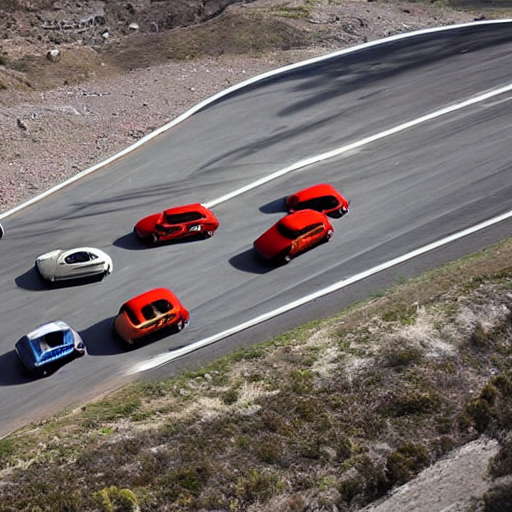

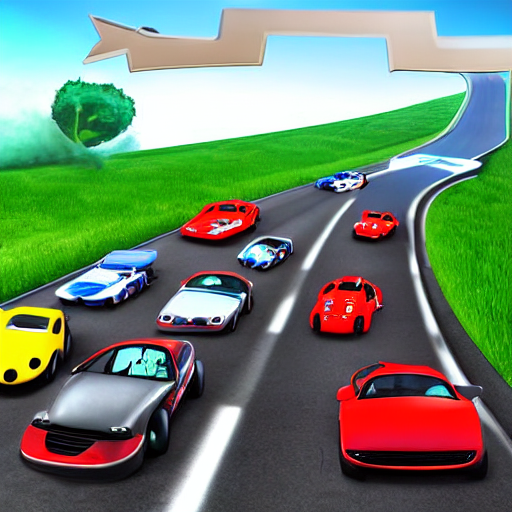

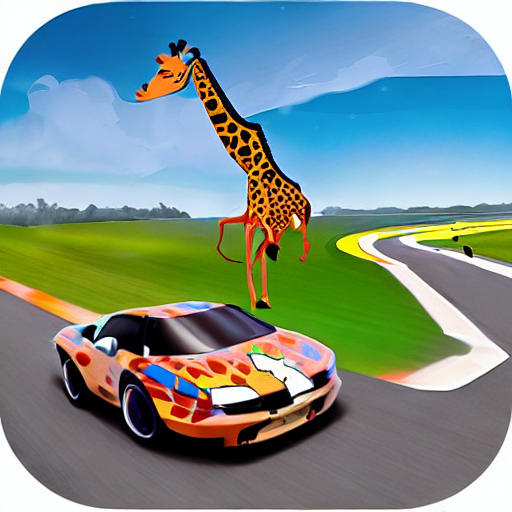

In [ ]:
prompt = ["car race on the road","car race on the roadWF0=!","car race on the roadgiraffe"]
output_images = diffusion_pipe(prompt=prompt).images

# Display images

for img in output_images:
    display(img)